# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="logo uni.png" width="100" height="100/1.618">
<figure>
    
    UNIVERSITÀ DEGLI STUDI DI TRENTO
    DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA
    A.A. 2022-2023
      
    
*Alunni:*  
Del Dò Giacomo, 221545       
Faccin Francesca, 222028       
Rossato Sofia, 218790 

# **Notebook 3: Test di Pearson** 

Il test di Pearson è un test non parametrico che fa uso della distribuzione Chi Quadro per verificare la bontà con la quale un set di dati è descritto da una distribuzione ipotizzata. Questa verifica viene effettuata confrontando le frequenze osservate con le frequenze teoriche.

\begin{equation}
{X^2(a,b)= ∑ \frac{N_j-n(P[H<h_{j+1}]-P[H<h_j])^2}{n(P[H<h_{j+1}]-P[H<h_j])}}
\end{equation}


Il test di Pearson fa parte di un'ampia classe di test detti test chi quadrato i quali hanno in comune le formule e la variabile casuale Chi Quadrato. 

Ci si aspetta che, in ogni intervallo, con limite destro h1h, ci siano $e=(l1h∗q)$ elementi mentre ce ne sono in realtà $o=(l1h∗r)$.  
La formula dell'$X^2$ è allora:
\begin{equation}
{X^2=\frac{1}{e}∑(e−o)^2}
\end{equation}

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

os.getcwd()
os.chdir("/Users/francescafaccin/Desktop/idrologia/Installations05122022/class2023/1_ESERCITAZIONE")
data = pd.read_csv('PluviometriaValdagno.txt')
map(datetime,data['Anno'])
data = data.set_index('Anno')

In [2]:
abs_m = pd.read_pickle("abs_m")
abs_mq = pd.read_pickle("abs_mq")
abs_mle = pd.read_pickle("abs_mle")

In [3]:
def X2(data,abs_t,h,delta):    
    dt = data[h].dropna()
    #print(dt)
    lh = len(dt)
    #print("lh: ",lh)
    q = [delta*(i+1) for i in range(int(1/delta))]
    #print("q: ",q)
    rv = gumbel_r(loc=abs_t.at["a",h], scale=abs_t.at["b",h])
    ecdf = ECDF(dt)
    r = ecdf(rv.ppf(q))
    #print("r: ",r)
    o0 = lh*r
    #print("o0: ",o0)
    o = o0-np.append([0], np.delete(o0,-1))
    #print("o: ",o)
    e = [delta*lh for i in range(len(r))]
    #print("e: ",e)
    return ((o-e)**2/e).sum()

In [4]:
a=[]
for  h in data.columns:
    a = a+[[X2(data,abs_m,h,0.2), X2(data,abs_mq,h,0.2), X2(data,abs_mle,h,0.2)]]
   
df = pd.DataFrame(a, index=["1h","3h","6h","12h","24h"], columns=["M","Mq","MLE"])
df

In [5]:
best = DataFrame([abs_mq["1h"],
                  abs_mle["3h"],
                  abs_mle["6h"],
                  abs_mq["12h"],
                  abs_m["24h"]]).T
best.to_pickle("best_param")                
best

In [8]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain = np.linspace(data.min()[0], data.max()[4], 100)

gb = pd.DataFrame([gumbel(t_rain,best,"1h"),
                   gumbel(t_rain,best,"3h"),
                   gumbel(t_rain,best,"6h"),
                   gumbel(t_rain,best,"12h"),
                   gumbel(t_rain,best,"24h")]).T
gb.index = t_rain
gb.columns = ["1h","3h","6h","12h","24h"]
gb[-5:]

Text(0, 0.5, 'P[H<h]')

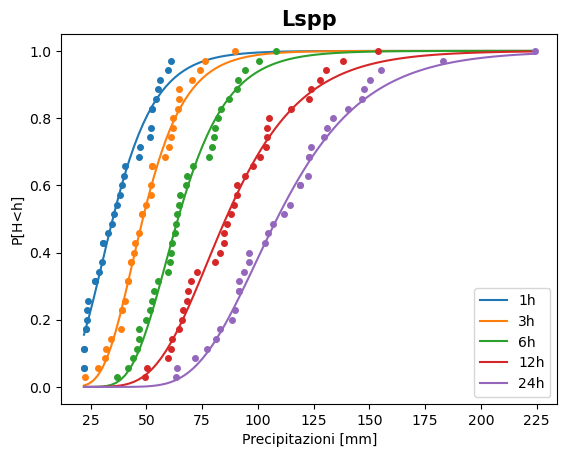

In [9]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
ax = gb.plot(color=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])

data1h = data["1h"]
ecdf1h = ECDF(data["1h"])
ax.plot(data1h, ecdf1h(data1h), "o", markersize=4, c="tab:blue", label="1h")

data3h = data["3h"].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h, ecdf3h(data3h), "o", markersize=4, c="tab:orange", label="3h")

data6h = data["6h"].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h, ecdf6h(data6h), "o", markersize=4, c="tab:green", label="6h")

data12h = data["12h"].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h, ecdf12h(data12h),"o", markersize=4, c="tab:red", label="12h")

data24h = data["24h"].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h, ecdf24h(data24h), "o", markersize=4, c="tab:purple", label="24h")

ax.set_title("Lspp", fontsize=15, fontweight="bold")
ax.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax.set_ylabel("P[H<h]", fontsize=10)